In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('menu.csv')

In [8]:
print("---------- First 5 Rows ----------")
print(df.head())

print(f"\nDataset shape: {df.shape}")

print("\n---------- Data Info ----------")
df.info()

---------- First 5 Rows ----------
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  

In [9]:
print("\n---------- Missing Values Count ----------")
print(df.isnull().sum())


---------- Missing Values Count ----------
Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


In [10]:
df.dropna(inplace=True)

In [11]:
numeric_cols = ['Calories', 'Total Fat', 'Saturated Fat', 'Carbohydrates', 'Sugars', 'Protein', 'Sodium']

for col in numeric_cols:
  if col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
  else:
    print(f"Warning: Column '{col}' not found in the dataset.")

print("\nData types have been checked and corrected.")


Data types have been checked and corrected.


In [12]:
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [13]:
print("\n---------- Data Info After Cleaning ----------")
df.info()

print("\n---------- Missing Values After Cleaning ----------")
print(df.isnull().sum())

print(f"\nShape after cleaning: {df.shape}")


---------- Data Info After Cleaning ----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  So

In [14]:
print("---------- Statistical Summary of Nutrition Facts ----------")
print(df.describe())

---------- Statistical Summary of Nutrition Facts ----------
          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.2

In [15]:
top_5_calories = df.sort_values(by='Calories', ascending=False).head(5)
print("\n---------- Top 5 Most Caloric Items ----------")
print(top_5_calories[['Item', 'Category', 'Calories']])

top_5_sugar = df.sort_values(by='Sugars', ascending=False).head(5)
print("\n---------- Top 5 Items with Most Sugar ----------")
print(top_5_sugar[['Item', 'Category', 'Sugars']])

top_5_sodium = df.sort_values(by='Sodium', ascending=False).head(5)
print("\n---------- Top 5 Items with Most Sodium ----------")
print(top_5_sodium[['Item', 'Category', 'Sodium']])


---------- Top 5 Most Caloric Items ----------
                                                 Item        Category  \
82                       Chicken McNuggets (40 piece)  Chicken & Fish   
32        Big Breakfast with Hotcakes (Large Biscuit)       Breakfast   
31      Big Breakfast with Hotcakes (Regular Biscuit)       Breakfast   
34  Big Breakfast with Hotcakes and Egg Whites (La...       Breakfast   
33  Big Breakfast with Hotcakes and Egg Whites (Re...       Breakfast   

    Calories  
82      1880  
32      1150  
31      1090  
34      1050  
33       990  

---------- Top 5 Items with Most Sugar ----------
                                                  Item            Category  \
253               McFlurry with M&M’s Candies (Medium)  Smoothies & Shakes   
246                           Strawberry Shake (Large)  Smoothies & Shakes   
249                            Chocolate Shake (Large)  Smoothies & Shakes   
251                             Shamrock Shake (Large)  Smoo

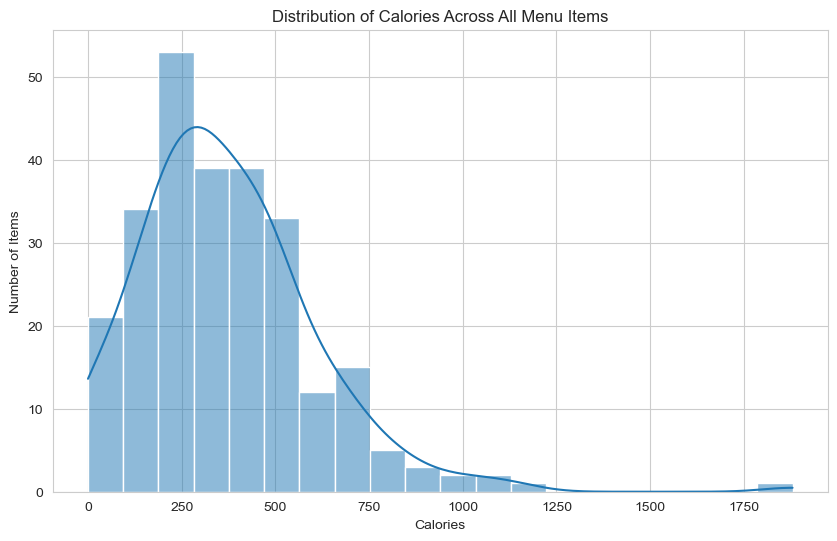

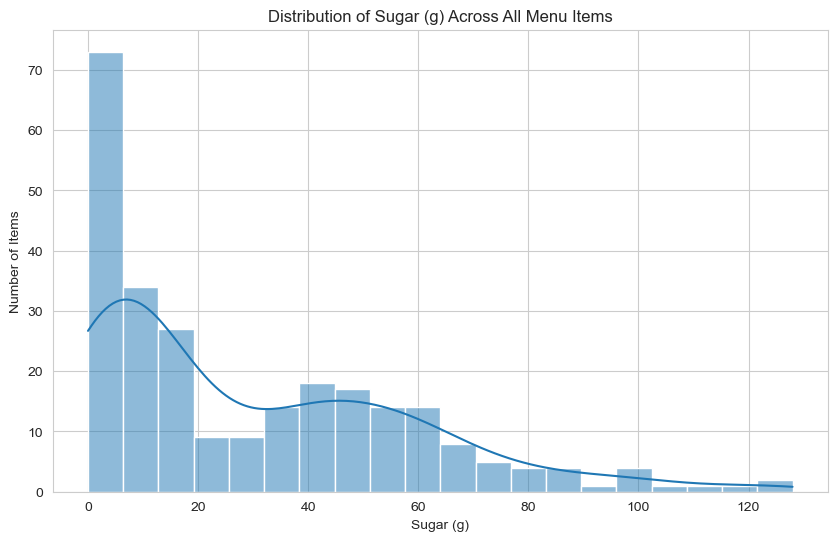

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

plt.figure(figsize=(10, 6)) 
sns.histplot(df['Calories'], bins=20, kde=True) 
plt.title('Distribution of Calories Across All Menu Items')
plt.xlabel('Calories')
plt.ylabel('Number of Items')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Sugars'], bins=20, kde=True)
plt.title('Distribution of Sugar (g) Across All Menu Items')
plt.xlabel('Sugar (g)')
plt.ylabel('Number of Items')
plt.show()

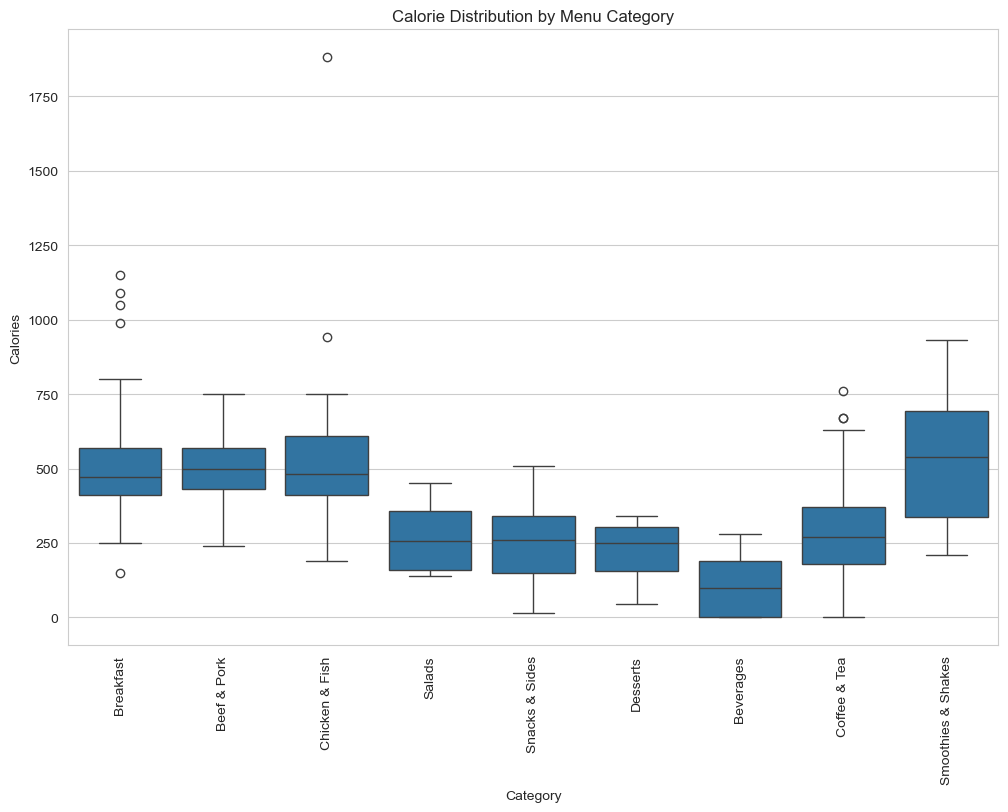

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Calories', data=df)
plt.xticks(rotation=90) 
plt.title('Calorie Distribution by Menu Category')
plt.xlabel('Category')
plt.ylabel('Calories')
plt.show()

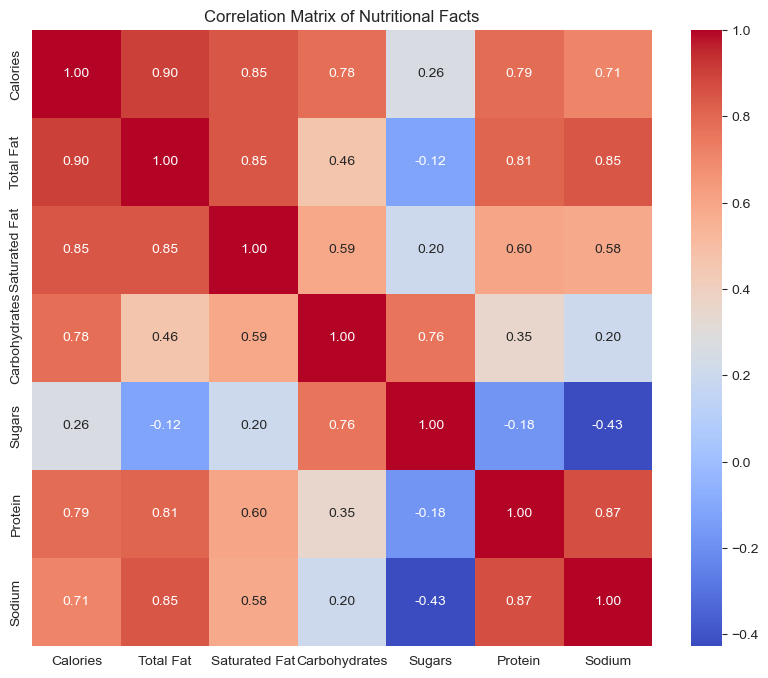

In [19]:
# Select only the numerical columns for the correlation matrix
numeric_cols = ['Calories', 'Total Fat', 'Saturated Fat', 'Carbohydrates', 'Sugars', 'Protein', 'Sodium']

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Nutritional Facts')
plt.show()

In [ ]:
RECOMMENDATONS

In [ ]:
🎯 For Marketing & Health-Conscious Customers
Promote "Build-Your-Own Healthy Meal" combinations using existing low-calorie items.
The analysis showed that categories like Salads and Snacks & Sides have significantly fewer calories.
A targeted marketing campaign could highlight combos under 500 calories, pairing a salad with grilled chicken and a low-fat dressing, 
to attract and retain health-conscious customers.

In [ ]:
👨‍🍳 For Menu Development & Innovation
Focus new product development on reducing fat content. 
The strong positive correlation between Total Fat and Calories proves that fat is the primary driver of high calorie counts.
The culinary team should prioritize lower-fat cooking methods like grilling or baking over frying to create new offerings that are inherently lower in calories without sacrificing flavor.

In [ ]:
🥤 For Beverage Strategy & Transparency
Enhance menu transparency for beverages and expand low-sugar options.
The analysis revealed that Beverages and Smoothies & Shakes are the main sources of hidden sugars.
Displaying calorie and sugar information prominently for drinks can help customers make informed choices. 
Introducing more zero-sugar or low-sugar drink alternatives would also cater to growing consumer demand for healthier options.